<a href="https://colab.research.google.com/github/Lfagundesnetto/MVP_MachineLearning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PUC-RIO - SPRINT: MACHINE LEARNING & ANALYTICS

## **MVP: Análise do Desempenho Estudantil**

### Leticia Fagundes Netto

# **Objetivo**


O objetivo deste estudo é analisar os fatores que influenciam o desempenho estudantil, considerando variáveis como características demográficas, frequência escolar e atividades extracurriculares. Além disso, o trabalho busca prever se o(a) aluno(a) será aprovado(a) ou reprovado(a), bem como estimar sua nota final ou situação acadêmica, utilizando técnicas de machine learning para identificar padrões e insights relevantes.

# **Descrição do Dataset**

Link para o Dataset Original: [Student Performance](https://archive.ics.uci.edu/dataset/320/student+performance)

**O Dataset**: Dois conjuntos de dados sobre o desempenho escolar de alunos (de escolas secundárias) em Matemática e Língua Portuguesa. Cada registro contem informações demográficas, educacionais e comportamentais por aluno, assim como suas notas.

### ***Atributos do Dataset***

#### *Sobre os Alunos:*

* **school:** Escola - (GP: Gabriel Pereira, MS: Mousinho da Silveira)
* **sex:** Sexo (F: Feminino, M: Masculino)
* **age:** Idade (15 a 22 anos)
* **address:** Tipo de área residencial (U: Urbano, R: Rural)
* **famsize:** Tamanho da família (LE3: <= 3, GT3: > 3)
* **Pstatus:** Estado civil dos pais (T: Juntos, A: Separados)

#### *Sobre os Pais/Responsáveis:*

* **Medu:** Grau de instrução da mãe (0: Nenhum, 1: Ensino primário, 2: Ensino fundamental, 3: Ensino médio, 4: Ensino superior)
* **Fedu:** Grau de instrução do pai

* **Mjob:** Profissão da mãe (teacher, health, services, at_home, other).
* **Fjob:** Profissão do pai

* **reason:** Motivo para escolha da escola (home, reputation, course, other)
* **guardian:** Responsável pelo aluno (mother, father, other)


#### *Sobre os estudos e vida escolar:*

* **traveltime:** Tempo de deslocamento casa-escola (1: <15 min, 2: 15-30 min, 3: 30-60 min, 4: >1 hora)
* **studytime:** Tempo de estudo semanal (1: <2 horas, 2: 2-5 horas, 3: 5-10 horas, 4: >10 horas)
* **failures:** Número de reprovações anteriores (0 a 3; 4 se >3)
* **schoolsup:** Suporte educacional extra (yes, no)
* **famsup:** Suporte educacional da família (yes, no)
* **paid:** Aulas extras pagas na disciplina (yes, no)
* **activities:** Atividades extracurriculares (yes, no)
* **nursery:** Frequentou pré-escola (yes, no)
* **higher:** Interesse em cursar ensino superior (yes, no)

#### *Estilo de vida:*

* **internet:** Acesso à internet em casa (yes, no)
* **romantic:** Está em um relacionamento amoroso (yes, no)
* **famrel:** Qualidade das relações familiares (1: Muito ruim, 5: Excelente)
* **freetime:** Tempo livre após a escola (1: Muito baixo, 5: Muito alto)
* **goout:** Frequência em sair com amigos (1: Muito baixa, 5: Muito alta)
* **Dalc:** Consumo de álcool em dias de semana (1: Muito baixo, 5: Muito alto)
* **Walc:** Consumo de álcool em fins de semana (1: Muito baixo, 5: Muito alto)
* **health:** Estado de saúde atual (1: Muito ruim, 5: Muito bom)

#### *Desempenho Acadêmico:*

* **absences:** Número de faltas na escola (0 a 93)
* **G1:** Nota do 1º período (0 a 20)
* **G2:** Nota do 2º período (0 a 20)
* **G3:** Nota final (0 a 20)

# **Processamento e Tratamento dos Dados**

## Importação dos Dados

In [2]:
import pandas as pd

# Caminho - Datasets - no GitHubg
math_url = "https://raw.githubusercontent.com/Lfagundesnetto/MVP_MachineLearning/main/student-mat.csv"
portuguese_url = "https://raw.githubusercontent.com/Lfagundesnetto/MVP_MachineLearning/main/student-por.csv"

# Ler arquivos
math_df = pd.read_csv(math_url, sep=';')
portuguese_df = pd.read_csv(portuguese_url, sep=';')

### *Mesclando os dois datasets em um:*

In [3]:
# Valores em Comum
common_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob",
    "reason", "nursery", "internet"
]

# Fazer a junção usando o método merge
data = pd.merge(math_df, portuguese_df, on=common_columns, suffixes=('_math', '_port'))


In [4]:
print(len(data)) #num de alunos

382


## Tratamento de Dados

In [5]:
import pandas as pd

In [6]:
print(data.head()) #head do dataset

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel_port freetime_port  goout_port  Dalc_port  Walc_port health_port  \
0           4             3           4          1          1           3   
1           5             3           3          1          1           3   
2           4             3           2          2          3           3   
3           3             2           2          1          1           5   
4           4             3           2          1          2           5   

  absences_port G1_port G2_port G3_port  
0       

In [7]:
print(data.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian_math', 'traveltime_math', 'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math', 'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet', 'romantic_math', 'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'guardian_port', 'traveltime_port', 'studytime_port', 'failures_port', 'schoolsup_port', 'famsup_port', 'paid_port', 'activities_port', 'higher_port', 'romantic_port', 'famrel_port', 'freetime_port', 'goout_port', 'Dalc_port', 'Walc_port', 'health_port', 'absences_port', 'G1_port', 'G2_port', 'G3_port']


### Media de Portugues e Classificacao

In [8]:
def classify_performance(data):
    # Calcular a média
    data['media_port'] = (data['G1_port'] + data['G2_port'] + data['G3_port']) / 3   # media de portugues

    # Condicionais
    classifications = []
    for media in data['media_port']:
        if media >= 18:
            classifications.append('Excelente')
        elif media >= 16:
            classifications.append('Muito Bom')
        elif media >= 14:
            classifications.append('Bom')
        elif media >= 12:
            classifications.append('Satisfatório')
        elif media >= 10:
            classifications.append('Mediano')
        else:
            classifications.append('Reprovado')

    data['class_port'] = classifications
    return data

In [9]:
# Aplicando ao dataset
data = classify_performance(data)

# Exibindo
print(data[['media_port', 'class_port']].head())

   media_port    class_port
0    7.333333     Reprovado
1   10.333333       Mediano
2   12.333333  Satisfatório
3   14.000000           Bom
4   12.333333  Satisfatório


### Media de Matematica e Classificacao

In [10]:
def classify_performance_math(data):
    # Calcular a média
    data['media_math'] = (data['G1_math'] + data['G2_math'] + data['G3_math']) / 3  # media de matematica

    # Condicionais
    classifications_math = []
    for mediam in data['media_math']:
        if mediam >= 18:
            classifications_math.append('Excelente')
        elif mediam >= 16:
            classifications_math.append('Muito Bom')
        elif mediam >= 14:
            classifications_math.append('Bom')
        elif mediam >= 12:
            classifications_math.append('Satisfatório')
        elif mediam >= 10:
            classifications_math.append('Mediano')
        else:
            classifications_math.append('Reprovado')

    data['class_math'] = classifications_math
    return data

In [11]:
# Aplicando ao dataset
data = classify_performance_math(data)

# Exibindo
print(data[['media_math', 'class_math']].head())

   media_math class_math
0    5.666667  Reprovado
1    5.333333  Reprovado
2    8.333333  Reprovado
3   14.666667        Bom
4    8.666667  Reprovado


# **Fatores que Levam ao Sucesso Acadêmico:**

## Preparação dos Dados

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder


In [13]:
data['aprovado_port'] = data['class_port'].apply(lambda x: 1 if x != 'Reprovado' else 0)

# Verificar os primeiros resultados

In [14]:
data['aprovado_math'] = data['class_math'].apply(lambda x: 1 if x != 'Reprovado' else 0)

# Verificar os primeiros resultados

## Português

### Fatores que influenciam a Aprovação em **Português**

In [15]:
# Features e alvo
X = data.drop(columns=['class_port', 'aprovado_port'], errors='ignore')
y = data['aprovado_port']

In [16]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Converter colunas categóricas em variáveis numéricas
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Garantir que as colunas de treino e teste sejam compatíveis
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [18]:
from dataclasses import dataclass
# Lista de colunas a serem removidas para regressão
columns_to_exclude = ['G1_port', 'G2_port', 'G3_port', 'G1_math', 'G2_math', 'G3_math', 'media_port','media_math']

# Criar subconjunto de features para regressão
X_train_regression = X_train_encoded.drop(columns=columns_to_exclude, errors='ignore')
X_test_regression = X_test_encoded.drop(columns=columns_to_exclude, errors='ignore')

# Treinar o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_regression, y_train)

# Importância das features
feature_importances = rf_model.feature_importances_
features = X_train_regression.columns
importance_port_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Fatores mais importantes
print("Fatores que Impactam a Aprovação em Portugues:")
print(importance_port_df)

Fatores que Impactam a Aprovação em Portugues:
                 Feature  Importance
5          failures_math    0.048052
15         failures_port    0.042040
12         absences_math    0.041197
56       higher_port_yes    0.037866
47       higher_math_yes    0.036439
..                   ...         ...
32          Mjob_teacher    0.002189
33           Fjob_health    0.001345
58  class_math_Excelente    0.000950
41   guardian_math_other    0.000593
60  class_math_Muito Bom    0.000225

[63 rows x 2 columns]


#### Tabela Completa

In [20]:
print(importance_port_df.to_string())

                    Feature  Importance
5             failures_math    0.048052
15            failures_port    0.042040
12            absences_math    0.041197
56          higher_port_yes    0.037866
47          higher_math_yes    0.036439
14           studytime_port    0.035012
1                      Medu    0.030835
4            studytime_math    0.030752
7             freetime_math    0.028823
20                Walc_port    0.027399
19                Dalc_port    0.027291
11              health_math    0.026166
2                      Fedu    0.025389
10                Walc_math    0.024740
22            absences_port    0.024300
26                address_U    0.023777
25                    sex_M    0.023511
9                 Dalc_math    0.023505
17            freetime_port    0.021564
18               goout_port    0.021384
23            aprovado_math    0.021020
21              health_port    0.019913
3           traveltime_math    0.019754
0                       age    0.019498


#### Gráfico

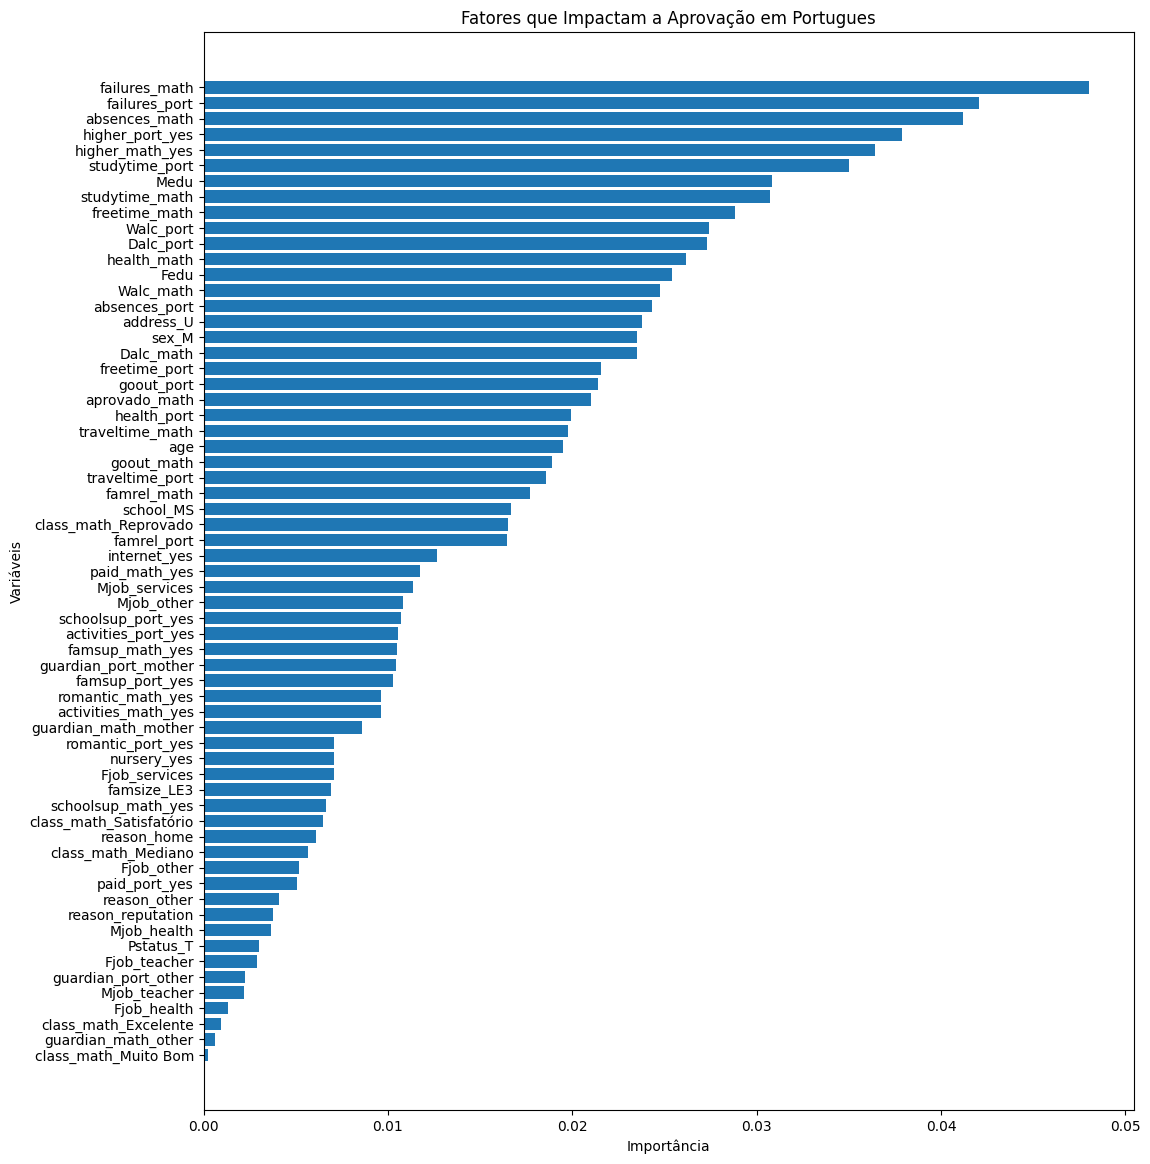

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,14))
plt.barh(importance_port_df['Feature'], importance_port_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Fatores que Impactam a Aprovação em Portugues')
plt.gca().invert_yaxis()

plt.show()

### Fatores que influenciam a Reprovação em **Português**

In [21]:
# Importância
importance_rp_df = pd.DataFrame({
    'Feature': X_train_regression.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Exibir fatores para reprovação
print("Fatores que Impactam a Reprovação:")
print(importance_rp_df)

Fatores que Impactam a Reprovação:
                 Feature  Importance
5          failures_math    0.048052
15         failures_port    0.042040
12         absences_math    0.041197
56       higher_port_yes    0.037866
47       higher_math_yes    0.036439
..                   ...         ...
32          Mjob_teacher    0.002189
33           Fjob_health    0.001345
58  class_math_Excelente    0.000950
41   guardian_math_other    0.000593
60  class_math_Muito Bom    0.000225

[63 rows x 2 columns]


#### Tabela Completa

In [22]:
print(importance_rp_df.to_string())

                    Feature  Importance
5             failures_math    0.048052
15            failures_port    0.042040
12            absences_math    0.041197
56          higher_port_yes    0.037866
47          higher_math_yes    0.036439
14           studytime_port    0.035012
1                      Medu    0.030835
4            studytime_math    0.030752
7             freetime_math    0.028823
20                Walc_port    0.027399
19                Dalc_port    0.027291
11              health_math    0.026166
2                      Fedu    0.025389
10                Walc_math    0.024740
22            absences_port    0.024300
26                address_U    0.023777
25                    sex_M    0.023511
9                 Dalc_math    0.023505
17            freetime_port    0.021564
18               goout_port    0.021384
23            aprovado_math    0.021020
21              health_port    0.019913
3           traveltime_math    0.019754
0                       age    0.019498


#### Gráfico

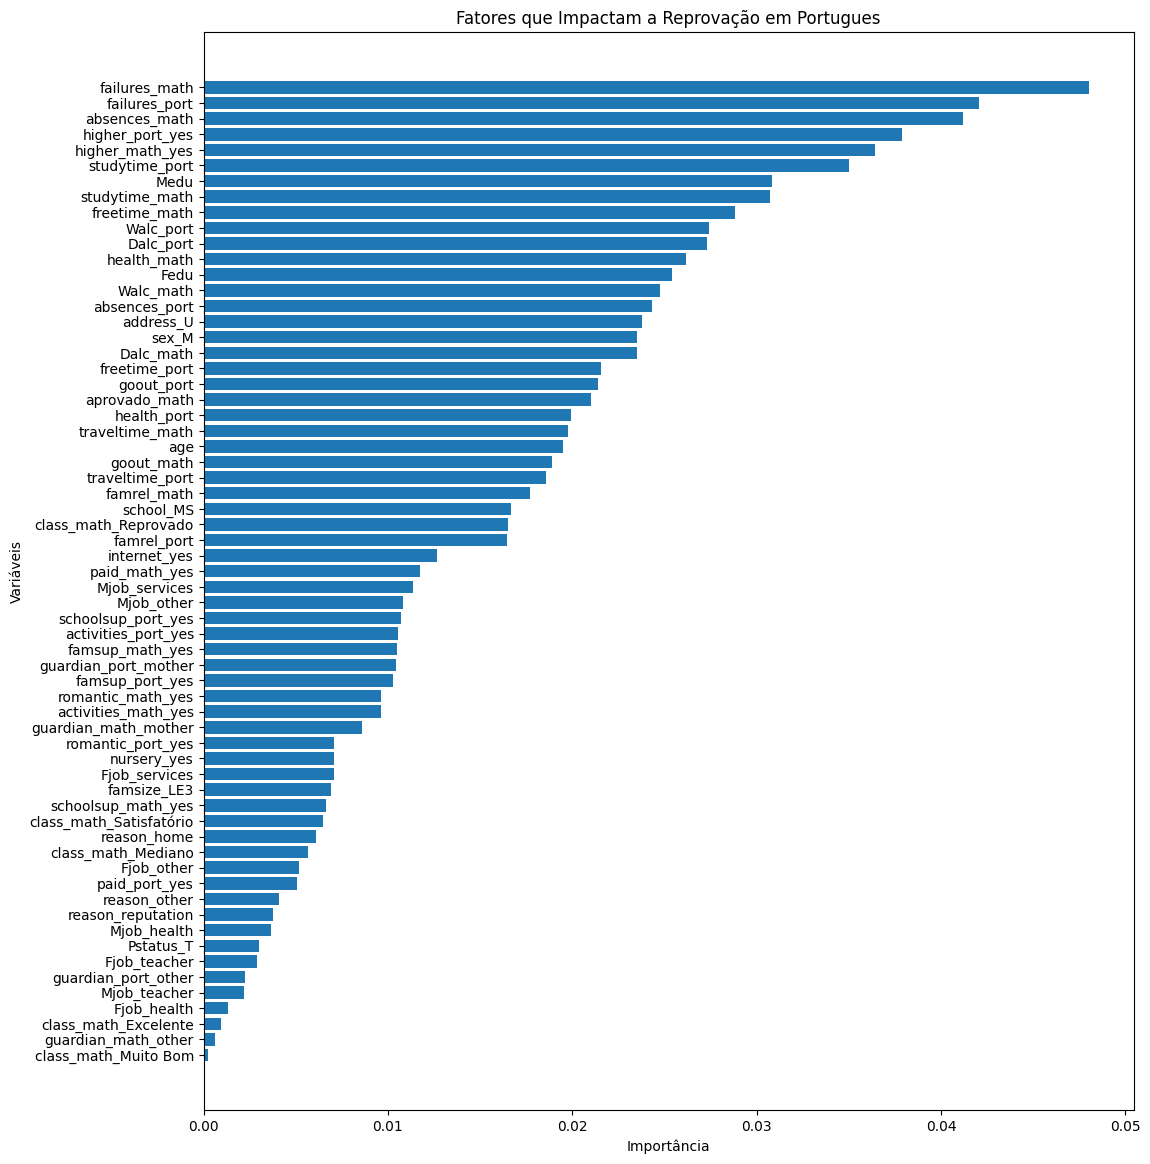

In [32]:
plt.figure(figsize=(12,14))
plt.barh(importance_rp_df['Feature'], importance_rp_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Fatores que Impactam a Reprovação em Portugues')
plt.gca().invert_yaxis()

plt.show()

## Matemática

### Fatores que influenciam a Aprovação em Matemática

In [23]:
# Features e alvo
Xm = data.drop(columns=['class_math', 'aprovado_math'], errors='ignore')
ym = data['aprovado_math']

# Dividir os dados em treino e teste
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state=42)

# Converter colunas categóricas em variáveis numéricas
Xm_train_encoded = pd.get_dummies(Xm_train, drop_first=True)
Xm_test_encoded = pd.get_dummies(Xm_test, drop_first=True)

# Garantir que as colunas de treino e teste sejam compatíveis
Xm_test_encoded = Xm_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [24]:
from dataclasses import dataclass
# Lista de colunas a serem removidas para regressão
columns_to_excludem = ['G1_port', 'G2_port', 'G3_port', 'G1_math', 'G2_math', 'G3_math', 'media_port','media_math']

# Criar subconjunto de features para regressão
Xm_train_regression = Xm_train_encoded.drop(columns=columns_to_excludem, errors='ignore')
Xm_test_regression = Xm_test_encoded.drop(columns=columns_to_excludem, errors='ignore')

# Treinar o modelo
rf_modelm = RandomForestClassifier(random_state=42)
rf_modelm.fit(Xm_train_regression, y_train)

# Importância das features
feature_importancesm = rf_modelm.feature_importances_
featuresm = Xm_train_regression.columns
importance_math_df = pd.DataFrame({'Feature': featuresm, 'Importance': feature_importancesm}).sort_values(by='Importance', ascending=False)

# Fatores mais importantes
print("Fatores que Impactam a Aprovação em Matemática:")
print(importance_math_df)

Fatores que Impactam a Aprovação em Portugues:
                 Feature  Importance
23         aprovado_port    0.307755
61  class_port_Reprovado    0.276305
5          failures_math    0.028291
15         failures_port    0.026775
56       higher_port_yes    0.023037
..                   ...         ...
54         paid_port_yes    0.000444
28             Pstatus_T    0.000317
60  class_port_Muito Bom    0.000064
41   guardian_math_other    0.000052
58  class_port_Excelente    0.000000

[63 rows x 2 columns]


#### Tabela Completa

In [29]:
print(importance_math_df.to_string())

                    Feature  Importance
23            aprovado_port    0.307755
61     class_port_Reprovado    0.276305
5             failures_math    0.028291
15            failures_port    0.026775
56          higher_port_yes    0.023037
47          higher_math_yes    0.021601
59       class_port_Mediano    0.021057
12            absences_math    0.017023
14           studytime_port    0.016117
1                      Medu    0.014161
9                 Dalc_math    0.011599
4            studytime_math    0.010542
2                      Fedu    0.010533
22            absences_port    0.010454
26                address_U    0.010085
19                Dalc_port    0.010069
11              health_math    0.009497
20                Walc_port    0.009492
3           traveltime_math    0.009342
25                    sex_M    0.008822
7             freetime_math    0.008764
18               goout_port    0.008684
10                Walc_math    0.008347
45      activities_math_yes    0.007629


#### Gráfico

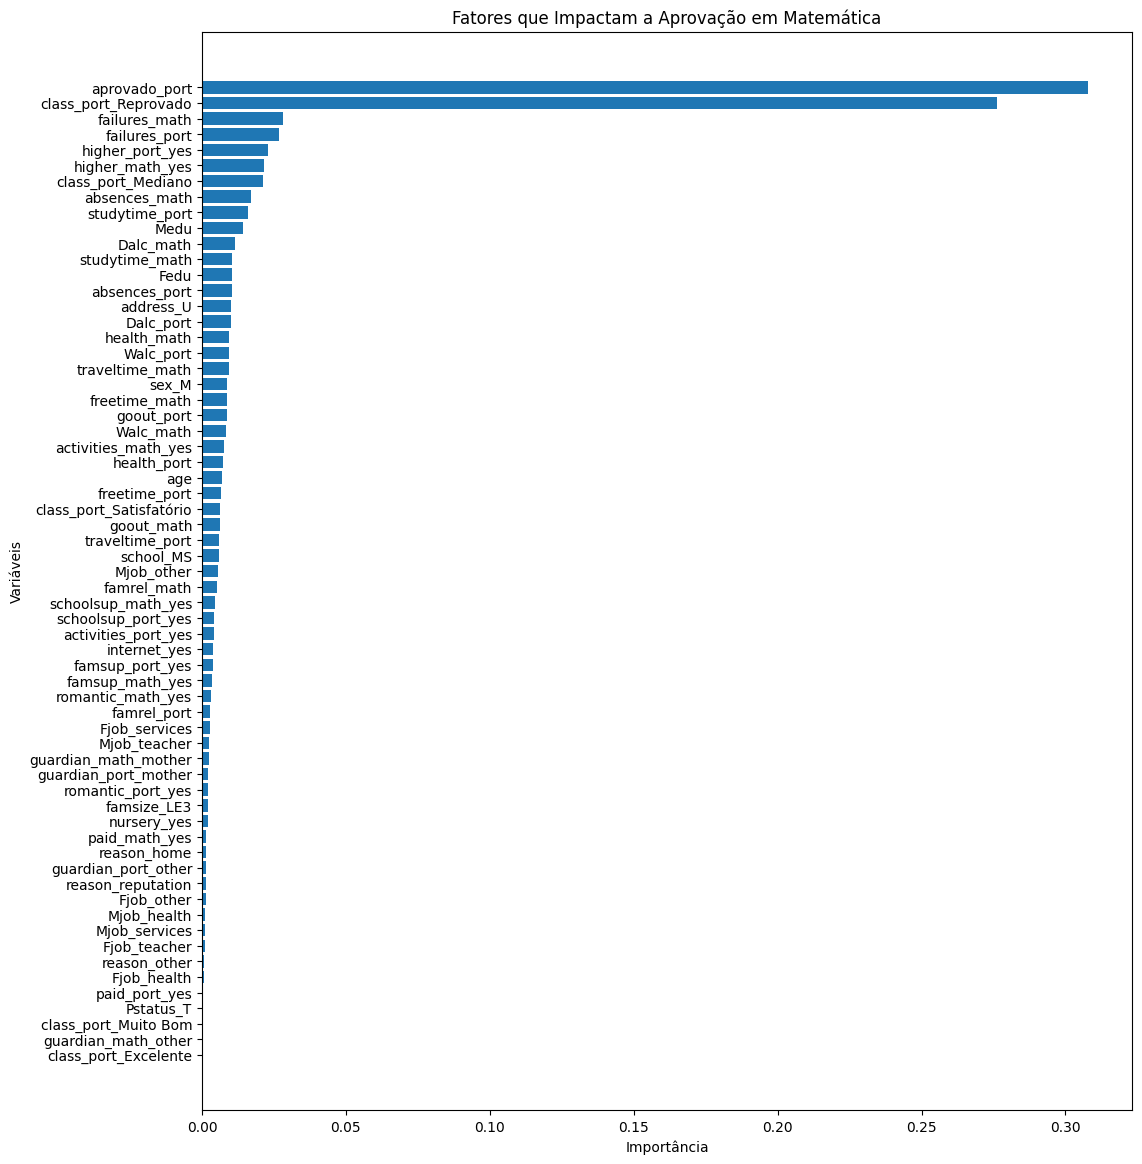

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,14))
plt.barh(importance_math_df['Feature'], importance_math_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Fatores que Impactam a Aprovação em Matemática')
plt.gca().invert_yaxis()

plt.show()

### Fatores que influenciam a Reprovação em Matemática

In [30]:
# Importância
importance_rm_df = pd.DataFrame({
    'Feature': Xm_train_regression.columns,
    'Importance': rf_modelm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Exibir fatores para reprovação
print("Fatores que Impactam a Reprovação:")
print(importance_rm_df)

Fatores que Impactam a Reprovação:
                 Feature  Importance
23         aprovado_port    0.307755
61  class_port_Reprovado    0.276305
5          failures_math    0.028291
15         failures_port    0.026775
56       higher_port_yes    0.023037
..                   ...         ...
54         paid_port_yes    0.000444
28             Pstatus_T    0.000317
60  class_port_Muito Bom    0.000064
41   guardian_math_other    0.000052
58  class_port_Excelente    0.000000

[63 rows x 2 columns]


#### Tabela Completa

In [31]:
print(importance_rm_df.to_string())

                    Feature  Importance
23            aprovado_port    0.307755
61     class_port_Reprovado    0.276305
5             failures_math    0.028291
15            failures_port    0.026775
56          higher_port_yes    0.023037
47          higher_math_yes    0.021601
59       class_port_Mediano    0.021057
12            absences_math    0.017023
14           studytime_port    0.016117
1                      Medu    0.014161
9                 Dalc_math    0.011599
4            studytime_math    0.010542
2                      Fedu    0.010533
22            absences_port    0.010454
26                address_U    0.010085
19                Dalc_port    0.010069
11              health_math    0.009497
20                Walc_port    0.009492
3           traveltime_math    0.009342
25                    sex_M    0.008822
7             freetime_math    0.008764
18               goout_port    0.008684
10                Walc_math    0.008347
45      activities_math_yes    0.007629


#### Gráfico

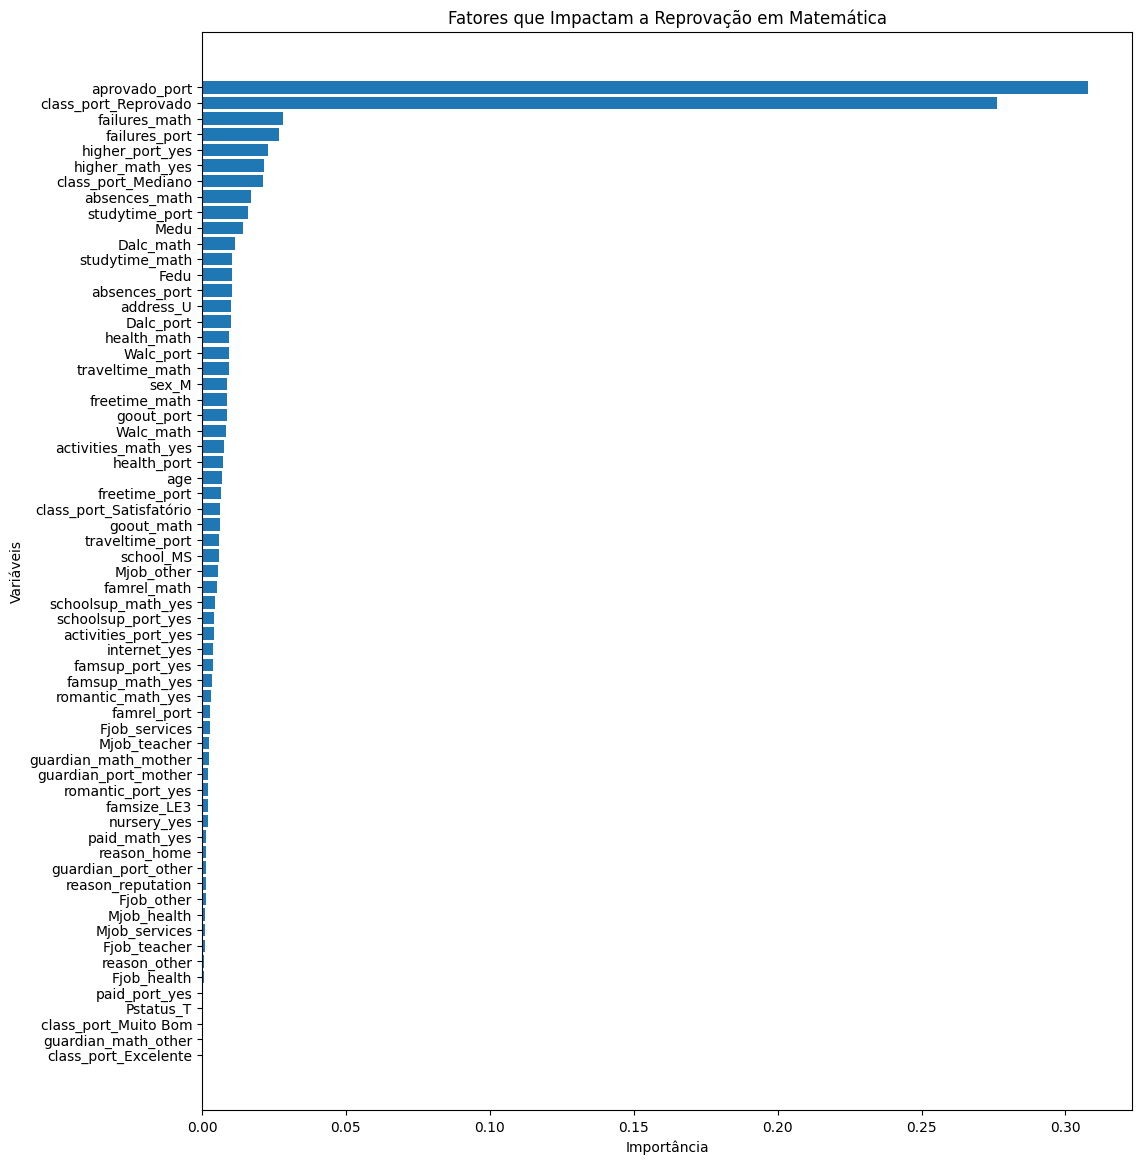

In [33]:
plt.figure(figsize=(12,14))
plt.barh(importance_rm_df['Feature'], importance_rm_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Fatores que Impactam a Reprovação em Matemática')
plt.gca().invert_yaxis()

plt.show()

# **Resultados**

## Classificação

## Regressão

# **Conclusão**